In [1]:
import workflow as wf
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [ ]:
path = "REGISTRO  FERNANDO PARA IA.xls"

In [2]:
datos_raw = wf.load_and_clean(path)

In [3]:
datos_chi = wf.chi_squared_test(datos_raw, 'EXITUS30D')

In [4]:
datos_imputed = wf.most_frequent_and_knn_imputation(datos_chi)

In [5]:
data_std = wf.standard_scaler(datos_imputed)

In [6]:
data_std['EXITUS30D'].value_counts()

no    343
si     29
Name: EXITUS30D, dtype: int64

In [7]:
data_encoded = wf.ordinal_encoding(data_std)

In [8]:
data_balanced = wf.smote_edited_nearest_neighbor(data_encoded, 'EXITUS30D')

In [9]:
data_balanced['EXITUS30D'].value_counts()

2    343
1    311
Name: EXITUS30D, dtype: int64

In [10]:
data_balanced_dropped = data_balanced.drop(columns = ['EXITUS30D'])

In [11]:
data_balanced.shape

(654, 31)

In [12]:
data_balanced_dropped.shape

(654, 30)

In [13]:
x_train, x_test, y_train, y_test, network_output = wf.prep_datos_red('EXITUS30D' , data_balanced, data_balanced_dropped)

(523, 30) (131, 30)
(523, 1) (131, 1)


In [14]:
a = pd.DataFrame(y_train, columns=['exitus'])

In [15]:
a['exitus'].value_counts()

0    274
1    249
Name: exitus, dtype: int64

In [16]:
best_params = wf.grid_search_mlp(x_train, y_train, x_test, y_test)

Tiempo total del Grid Search:  76.0 minutos

Acurracy de la red: 0.998088 usando {'batch_size': 16, 'dropout_rate': 0.1, 'epochs': 1000, 'neurons': 8}

0.992352 con: {'batch_size': 16, 'dropout_rate': 0.1, 'epochs': 1000, 'neurons': 4}
0.998088 con: {'batch_size': 16, 'dropout_rate': 0.1, 'epochs': 1000, 'neurons': 8}
0.996176 con: {'batch_size': 16, 'dropout_rate': 0.1, 'epochs': 1000, 'neurons': 12}
0.996176 con: {'batch_size': 16, 'dropout_rate': 0.15, 'epochs': 1000, 'neurons': 4}
0.996176 con: {'batch_size': 16, 'dropout_rate': 0.15, 'epochs': 1000, 'neurons': 8}
0.996176 con: {'batch_size': 16, 'dropout_rate': 0.15, 'epochs': 1000, 'neurons': 12}
0.992352 con: {'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 1000, 'neurons': 4}
0.996176 con: {'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 1000, 'neurons': 8}
0.994264 con: {'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 1000, 'neurons': 12}
0.994264 con: {'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 1000, 'neurons': 4}
0.

In [17]:
best_params

{'batch_size': 16, 'dropout_rate': 0.1, 'epochs': 1000, 'neurons': 8}

In [18]:
best_model = wf.create_model(dropout_rate=best_params['dropout_rate'], neurons=best_params['neurons'])

Train on 418 samples, validate on 105 samples
Epoch 1/1000

Epoch 00001: val_loss improved from inf to 0.71941, saving model to models/best_model.h5
418/418 - 1s - loss: 0.7219 - acc: 0.4067 - val_loss: 0.7194 - val_acc: 0.4667
Epoch 2/1000

Epoch 00002: val_loss improved from 0.71941 to 0.71384, saving model to models/best_model.h5
418/418 - 0s - loss: 0.7139 - acc: 0.4258 - val_loss: 0.7138 - val_acc: 0.4667
Epoch 3/1000

Epoch 00003: val_loss improved from 0.71384 to 0.70883, saving model to models/best_model.h5
418/418 - 0s - loss: 0.7203 - acc: 0.3971 - val_loss: 0.7088 - val_acc: 0.4762
Epoch 4/1000

Epoch 00004: val_loss improved from 0.70883 to 0.70471, saving model to models/best_model.h5
418/418 - 0s - loss: 0.7161 - acc: 0.4258 - val_loss: 0.7047 - val_acc: 0.4857
Epoch 5/1000

Epoch 00005: val_loss improved from 0.70471 to 0.70031, saving model to models/best_model.h5
418/418 - 0s - loss: 0.7100 - acc: 0.4378 - val_loss: 0.7003 - val_acc: 0.4857
Epoch 6/1000

Epoch 00006: v

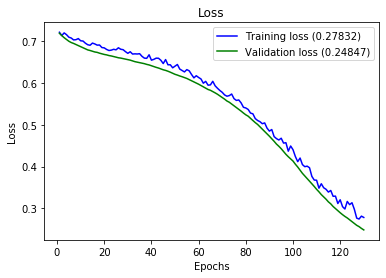

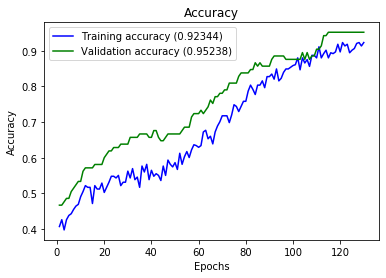

In [19]:
best_model_train = wf.train_model(best_model, best_params, x_train, y_train)



RMSE = 0.19536616629114087

Classification Report

              precision    recall  f1-score   support

           0    0.95714   0.97101   0.96403        69
           1    0.96721   0.95161   0.95935        62

    accuracy                        0.96183       131
   macro avg    0.96218   0.96131   0.96169       131
weighted avg    0.96191   0.96183   0.96181       131



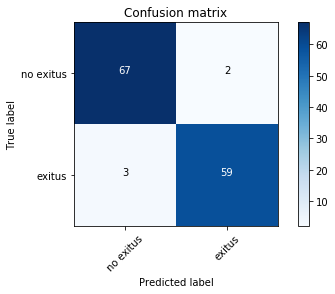

In [20]:
wf.predict_model_and_report(best_model_train, x_test, y_test, ['no exitus', 'exitus'])